### <p style="text-align:center;"><span style="color:red">MASTER THESIS </span></p>
<h1 style="padding:8px;background-color:lightblue;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px;overflow:hidden;font-weight:500">AIRLINE DATA ANALYSIS USNG SQL AND PYTHON</h1>



#  <p><span style="color:red">Business Problem </span></p>

Our company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to analyze their database and identify opportunities to increase the occupancy rate, thereby boosting the average profit earned per seat.

# Key Obstacles
1. **Stricter environmental regulations:** The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

2. **Higher flight taxes:** Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.

3. **Tight labor market resulting in increased labor costs:** The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

<br><br>
Let's get started !!

# Importing Libraries

In [90]:
# Import necessary libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json



# Ignore warnings  
import warnings
warnings.filterwarnings('ignore')

# Connecting to Database

In [91]:

# Connect to SQLite database
conn = sqlite3.connect('travel.sqlite')

# Create a cursor object
cursor = conn.cursor()


# List of Tables

In [92]:
# Read tables from SQLite database

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


# Data Exploration

In [93]:
# Read aircrafts_data table from SQLite database

aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


### Observation
- Seems like we have some data in multiple languages.
- We need to keep only understandable data

In [94]:
# Apply lambda function to extract 'en' field from 'model' column

aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


In [95]:
# Read data from the "airports_data" table

airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [96]:
import json

# Function to safely decode JSON or return None if value is empty or not in JSON format
def safe_decode(json_string):
    try:
        if json_string:
            return json.loads(json_string)['en']
        else:
            return None
    except (json.JSONDecodeError, KeyError):
        return None

# Apply safe decoding to the 'airport_name' column
airports_data['airport_name'] = airports_data['airport_name'].apply(safe_decode)

# Apply safe decoding to the 'city' column
airports_data['city'] = airports_data['city'].apply(safe_decode)


In [97]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [98]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [99]:
bookings = pd.read_sql_query("select * from bookings", conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [100]:
flights = pd.read_sql_query("select * from flights", conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [101]:
seats = pd.read_sql_query("select * from seats", conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [102]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [103]:
tickets = pd.read_sql_query("select * from tickets", conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


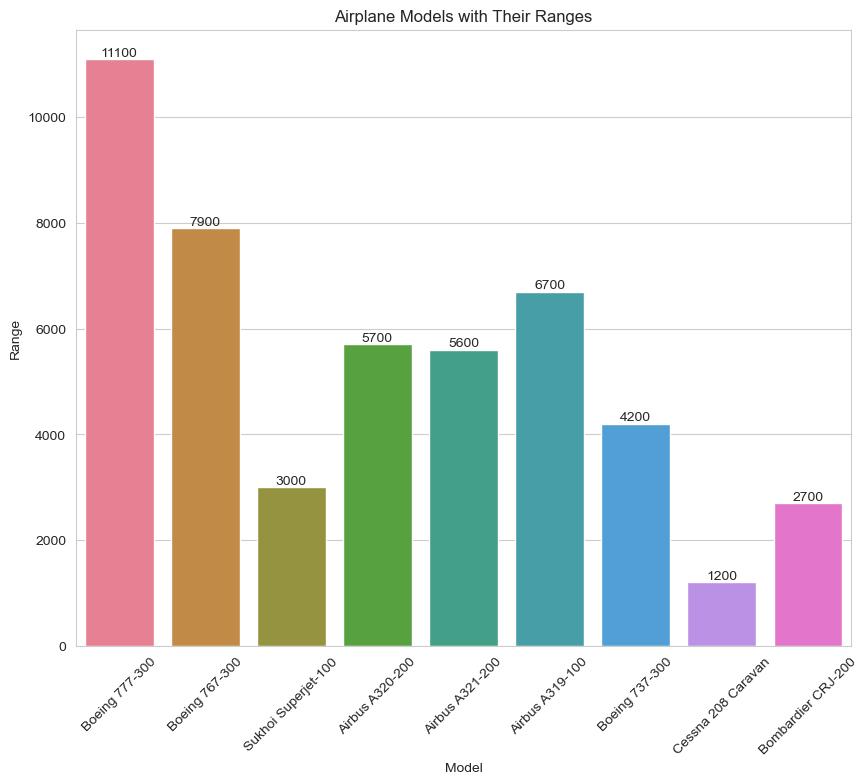

In [104]:
# Set the seaborn style to 'whitegrid'.
sns.set_style('whitegrid')

# Create a figure and axis object using matplotlib with a specified size.
fig, axes = plt.subplots(figsize=(10, 8))

# Generate a custom color palette using the 'husl' color palette from seaborn, with the number of colors equal to the unique number of airplane models.
custom_palette = sns.color_palette('husl', n_colors=len(aircrafts_data['model'].unique()))

# Create a bar plot with x-values as the airplane models, y-values as the range, and data from the 'aircrafts_data' DataFrame, using the custom color palette.
ax = sns.barplot(x='model', y='range', data=aircrafts_data, palette=custom_palette)

# Add labels to the bars in the plot.
for container in ax.containers:
    ax.bar_label(container)

# Set the title of the plot to 'Airplane Models with Their Ranges'.
plt.title('Airplane Models with Their Ranges')

# Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Set the labels for x-axis and y-axis.
plt.xlabel('Model')
plt.ylabel('Range')

# Display the plot.
plt.show()




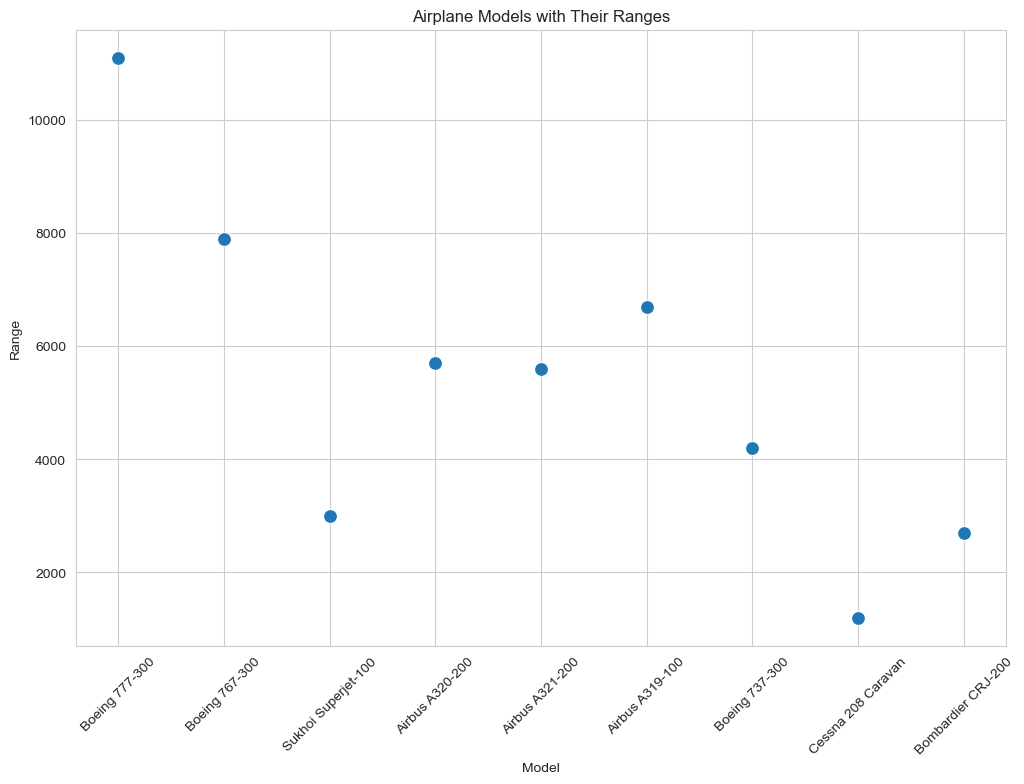

In [105]:
# Set the seaborn style to 'whitegrid'.
sns.set_style('whitegrid')

# Create a figure and axis object using matplotlib with a specified size.
fig, axes = plt.subplots(figsize=(12, 8))

# Create a scatter plot with x-values as the airplane models, y-values as the range, and data from the 'aircrafts_data' DataFrame.
# Use the 'Paired' palette for coloring the markers and set the size of the markers to 100.
ax = sns.scatterplot(x='model', y='range', data=aircrafts_data, palette='Paired', s=100)

# Set the title of the plot to 'Airplane Models with Their Ranges'.
plt.title('Airplane Models with Their Ranges')

# Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)

# Set the labels for x-axis and y-axis.
plt.xlabel('Model')
plt.ylabel('Range')

# Display the plot.
plt.show()



### Planes having more than 150 seats

In [106]:
# Read SQL query results into a DataFrame.
df = pd.read_sql_query("""
                        SELECT aircraft_code, COUNT(*) AS num_seats 
                        FROM seats
                        GROUP BY aircraft_code 
                        HAVING num_seats > 150
                        """, conn)

# Save the DataFrame to a CSV file named 'aircraft_seats.csv'.
df.to_csv('aircraft_seats.csv')


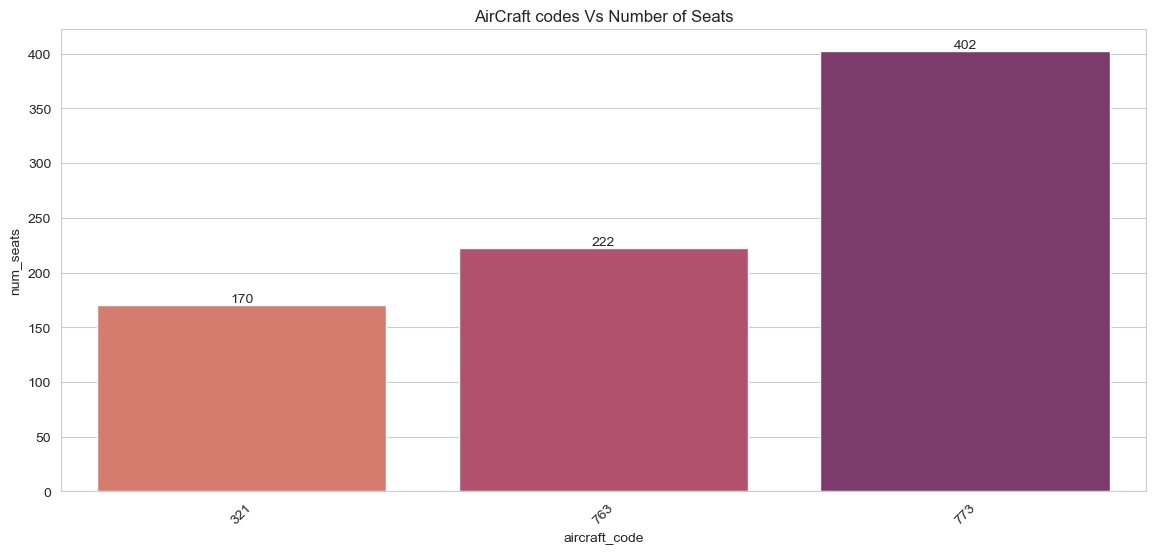

In [107]:
# Set the seaborn style to 'whitegrid'.
sns.set_style('whitegrid')

# Create a figure and axes with the specified size.
fig, axes = plt.subplots(figsize=(14, 6))

# Create a bar plot.
ax = sns.barplot(x='aircraft_code', y='num_seats', data=df, palette='flare')

# Add labels to the bars.
for container in ax.containers:
    ax.bar_label(container)

# Set the title of the plot.
plt.title('AirCraft codes Vs Number of Seats')

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=45)

# Display the plot.
plt.show()


In [108]:
# Read data from the SQL query into a DataFrame.
crafts = pd.read_sql("""SELECT aircraft_code, model->'en'
                        FROM aircrafts_data
                        where aircraft_code IN (319, 320, 321, 733, 763, 773);""", conn)

# Display the DataFrame.
crafts


,aircraft_code,model->'en'
0,773,"""Boeing 777-300"""
1,763,"""Boeing 767-300"""
2,320,"""Airbus A320-200"""
3,321,"""Airbus A321-200"""
4,319,"""Airbus A319-100"""
5,733,"""Boeing 737-300"""


### Observation
Successful Derivation of Aircraft Names: The analysis successfully derived the names of airplanes using their corresponding codes. This process likely involved querying a database table containing information about aircraft models and their codes. By associating the codes with their respective names, the analysis now has a more intuitive representation of the aircraft data.

Maximum Seating Capacity: Among the identified aircraft, the "Boeing 777-300" stands out as having the maximum number of seats, specifically 402 seats. This insight is crucial for understanding the distribution of seating capacity across different aircraft models. It can inform decisions related to fleet management, route planning, and passenger capacity optimization.

### Number of tickets booked and total amount earned changed with the time

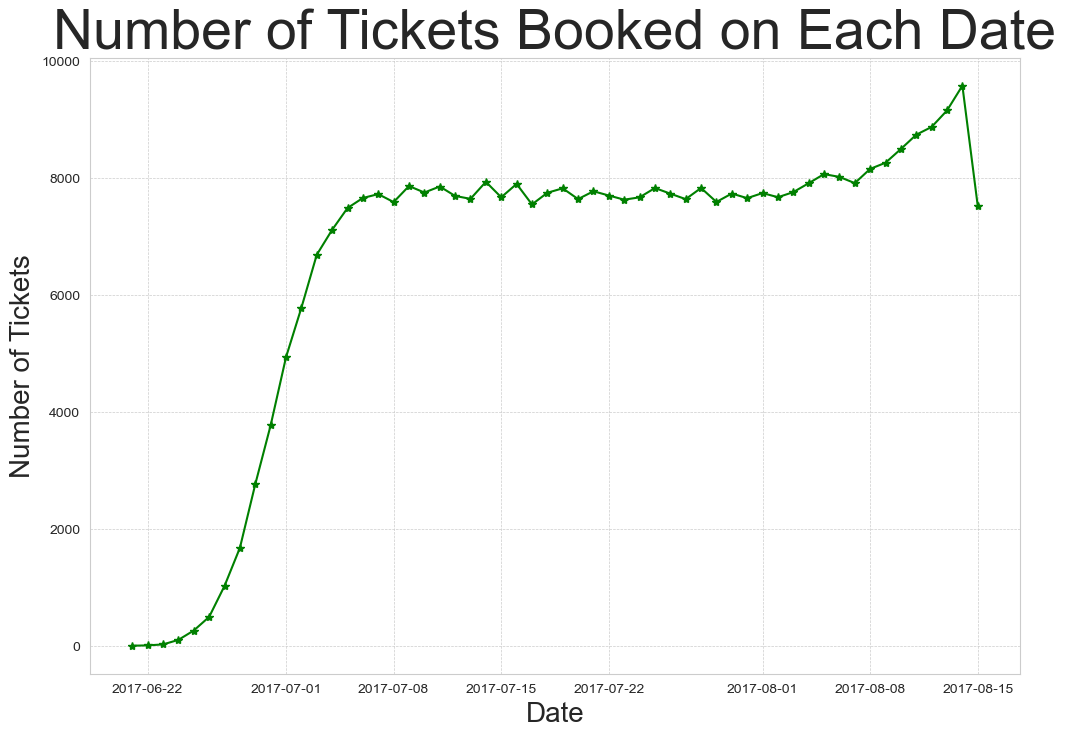

In [109]:
# Read data from the SQL query into a DataFrame.
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", conn)

# Convert 'book_date' column to datetime and extract date.
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date

# Group by date and count the number of tickets booked on each date.
tickets_count = tickets.groupby('date')[['date']].count()

# Plot the number of tickets booked on each date.
plt.figure(figsize=(12,8))
plt.plot(tickets_count.index, tickets_count['date'], color='green', scalex=True, marker="*")
plt.title('Number of Tickets Booked on Each Date', fontsize=40)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Observation
- Utilized a line chart visualization to analyze the trend of ticket bookings and revenue earned.
- The number of tickets booked showed a gradual increase from June 22nd to July 7th.
- From July 8th until August, ticket bookings remained relatively stable with a noticeable peak in bookings on a single day.
- The revenue earned by the company is closely correlated with the number of tickets booked.
- The total revenue earned followed a similar trend throughout the analyzed time period.
- Further exploration of the factors contributing to the peak in ticket bookings could help increase overall revenue and optimize operational strategies.

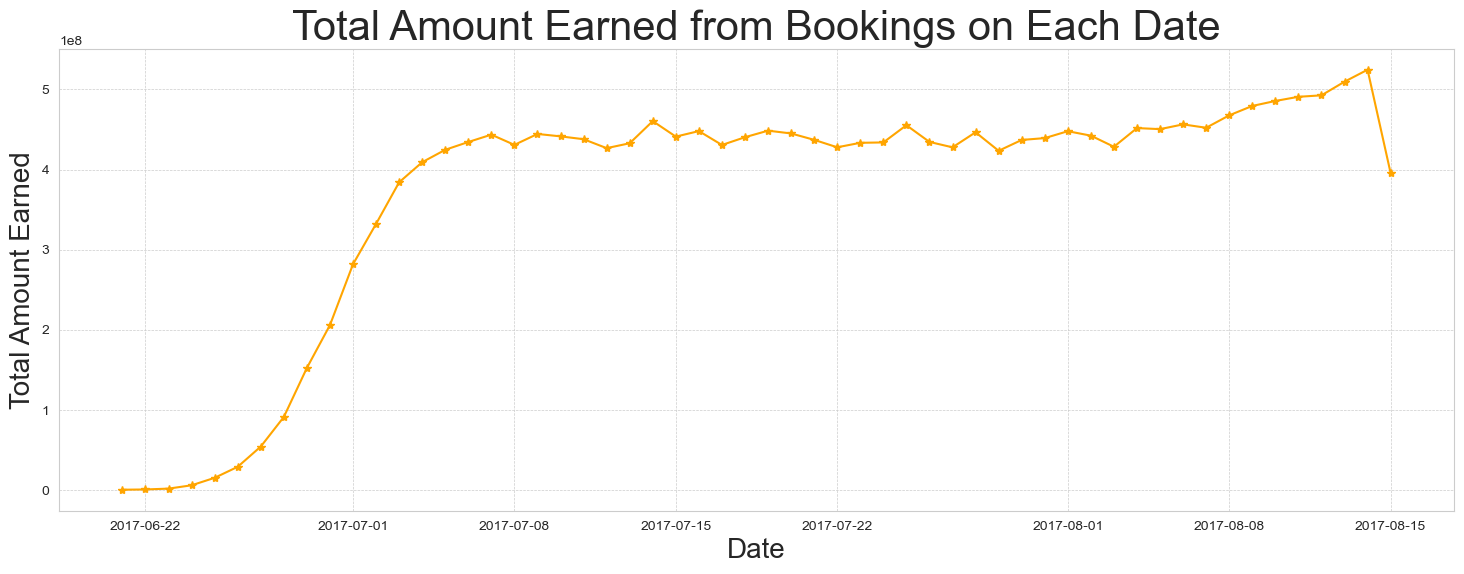

In [110]:
# Read data from the SQL query into a DataFrame.
bookings = pd.read_sql_query("select * from bookings", conn)

# Convert 'book_date' column to datetime and extract date.
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date

# Group by date and sum the total amount earned on each date.
booking_amount = bookings.groupby('date')[['total_amount']].sum()

# Plot the total amount earned on each date.
plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'], color='orange', scalex=True, marker='*')
plt.title('Total Amount Earned from Bookings on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Fare Distribution for the Flights

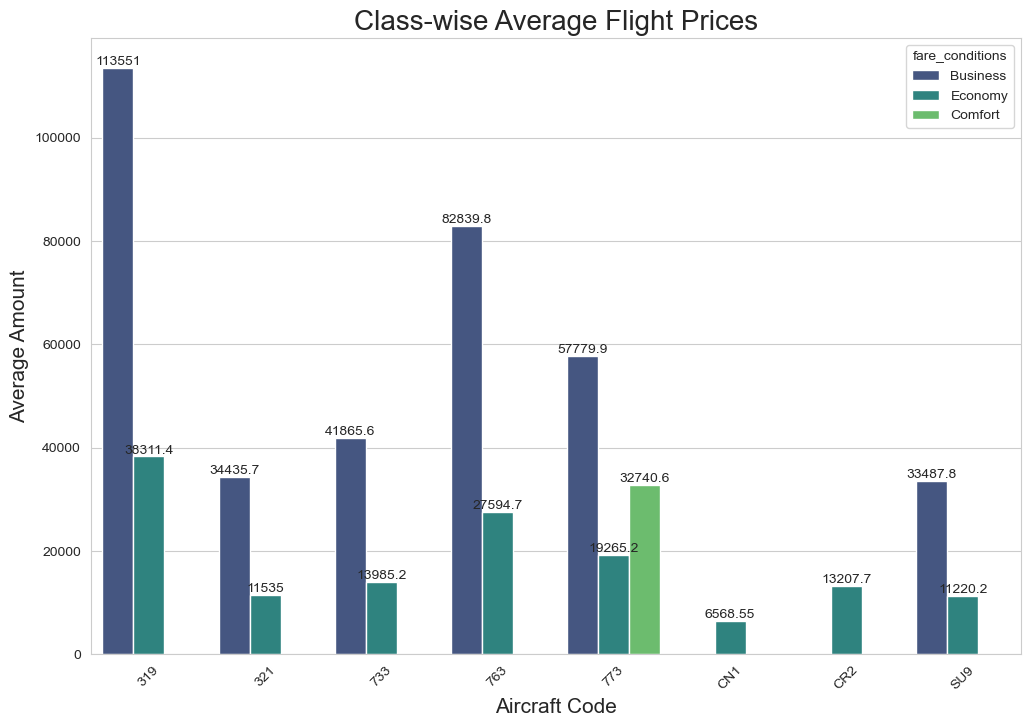

In [111]:
# Read data from the SQL query into a DataFrame and save to CSV.
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", conn)
df.to_csv('fare_avg_amount.csv')

# Plotting the class-wise average flight prices.
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='aircraft_code', y='avg(amount)', hue='fare_conditions', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class-wise Average Flight Prices', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Aircraft Code', fontsize=15)
plt.ylabel('Average Amount', fontsize=15)
plt.show()


In [112]:
# Read data from the SQL query into a DataFrame.
crafts = pd.read_sql("""SELECT aircraft_code, model->'en'
                        FROM aircrafts_data
                        where aircraft_code IN (319, 321, 733, 763, 773, 'CN1', 'CR2', 'SU9');""", conn)
crafts


,aircraft_code,model->'en'
0,773,"""Boeing 777-300"""
1,763,"""Boeing 767-300"""
2,SU9,"""Sukhoi Superjet-100"""
3,321,"""Airbus A321-200"""
4,319,"""Airbus A319-100"""
5,733,"""Boeing 737-300"""
6,CN1,"""Cessna 208 Caravan"""
7,CR2,"""Bombardier CRJ-200"""


### Observation
- Here we successfully derived the names of airplanes using their codes
- So it seems like " Airbus A319-100 " is having maximum  average number of Business class seats.
- Also " Airbus A319-100 " is having maximum average number of Economy seats.
- And " Boeing 777-300 " is having maximum number of Comfort seats.

# Examining Occupancy Rate

To maximize profitability, airlines must analyze revenue streams, including overall income, average revenue per ticket, and occupancy rates. This information helps identify profitable aircraft types, itineraries, and pricing optimization opportunities. The highest total revenue is generated by the SU9 aircraft, likely due to its lower ticket prices. The CN1 aircraft has the lowest total revenue, possibly due to its limited economy class offering. Monitoring average occupancy rates helps airlines fill seats efficiently, increase revenue, and reduce expenses. Improving occupancy rates can be financially beneficial and achieved through pricing strategies and operational considerations. Airlines should focus on optimizing pricing strategies for gradual revenue growth.

##  Total revenue per year and the average revenue per ticket.

In [113]:
# Read data from the SQL query into a DataFrame and export it to a CSV file.
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", conn)
revenue.to_csv('revenue.csv')


### Calculate the average occupancy per aircraft

In [114]:
# Define the SQL query to calculate the average occupancy per aircraft
occupancy_rate_query = """
    SELECT 
        a.aircraft_code,
        AVG(a.seats_count) AS booked_seats,
        b.num_seats,
        AVG(a.seats_count) / b.num_seats AS occupancy_rate
    FROM (
        SELECT 
            aircraft_code,
            flights.flight_id,
            COUNT(*) AS seats_count
        FROM 
            boarding_passes
        INNER JOIN 
            flights ON boarding_passes.flight_id = flights.flight_id
        GROUP BY 
            aircraft_code,
            flights.flight_id
    ) AS a
    INNER JOIN (
        SELECT 
            aircraft_code,
            COUNT(*) AS num_seats
        FROM 
            seats
        GROUP BY 
            aircraft_code
    ) AS b ON a.aircraft_code = b.aircraft_code
    GROUP BY 
        a.aircraft_code
"""

# Execute the query to get the average occupancy per aircraft data
occupancy_rate = pd.read_sql_query(occupancy_rate_query, conn)

# Display the average occupancy per aircraft data
print(occupancy_rate)

  aircraft_code       booked_seats  num_seats      occupancy_rate
0           319  53.58318098720292        116 0.46192397402761143
1           321  88.80923076923077        170  0.5224072398190045
2           733  80.25546218487395        130   0.617349709114415
3           763 113.93729372937294        222  0.5132310528350132
4           773  264.9258064516129        402   0.659019419033863
5           CN1  6.004431314623338         12  0.5003692762186115
6           CR2  21.48284690220174         50 0.42965693804403476
7           SU9  56.81211267605634         97  0.5856918832583128


### Calculating how much the total annual turnover would increase by giving all aircraft a 10% higher occupancy rate.

In [115]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [116]:
pd.set_option("display.float_format",str)
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", conn)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,inc occupancy rate,inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [117]:
import pandas as pd

# Assuming you already have the 'total_revenue' DataFrame and the 'occupancy_rate' DataFrame

# Calculate the proportion of total revenue contributed by each aircraft code
total_revenue['revenue_proportion'] = total_revenue['total_revenue'] / total_revenue['total_revenue'].sum()

# Display the DataFrame to verify the calculations
print(total_revenue)


  aircraft_code  total_revenue   revenue_proportion
0           319     2706163100  0.13031085804099718
1           321     1638164100  0.07888311295167609
2           733     1426552100  0.06869328319168436
3           763     4371277100  0.21049169934951883
4           773     3431205500  0.16522408897674673
5           CN1       96373800 0.004640722715741507
6           CR2     1982760500  0.09547658899228824
7           SU9     5114484700  0.24627964578134706


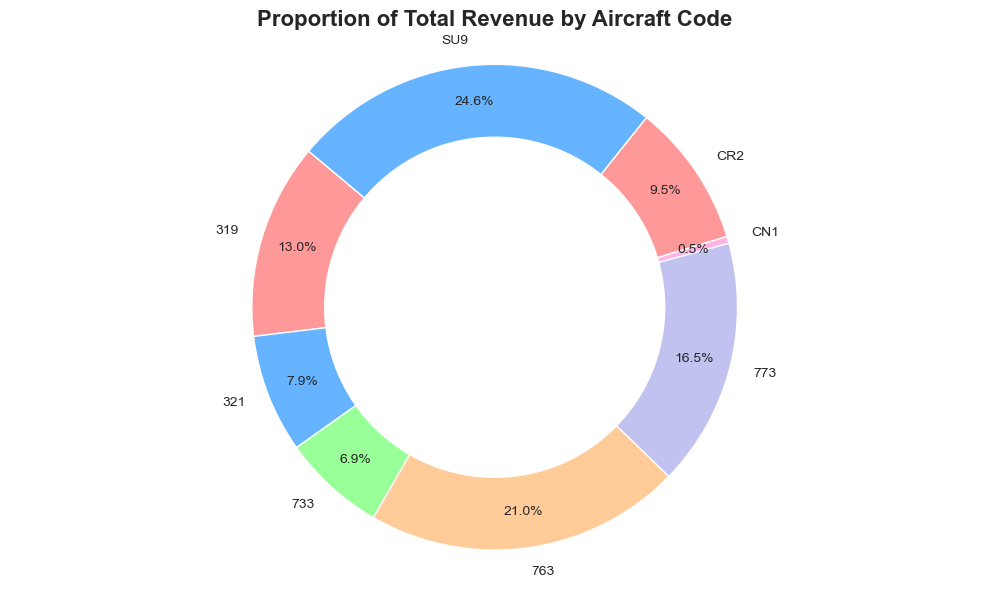

In [118]:
import matplotlib.pyplot as plt

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Create a pie chart with custom styling
plt.figure(figsize=(10, 6))
plt.pie(total_revenue['revenue_proportion'], labels=total_revenue['aircraft_code'], colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Proportion of Total Revenue by Aircraft Code', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()



# Conclusion

In conclusion, the airline industry has the potential to enhance profitability significantly through meticulous analysis of revenue data and strategic decision-making. Key metrics like total revenue, average revenue per ticket, and average occupancy per aircraft are instrumental in this analysis. Airlines can boost profitability by identifying improvement areas, refining pricing strategies, and optimizing flight routes. However, it's crucial for airlines to prioritize consumer satisfaction and safety alongside profit-seeking endeavors. Achieving a balance between these factors is essential for long-term viability in the competitive airline sector. Embracing a data-driven approach to revenue analysis and optimization holds the promise of fostering sustainable growth and enduring success.

In [119]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('travel.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Query to fetch table names from sqlite_master
table_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor.execute(table_query)

# Fetch all table names
table_names = cursor.fetchall()

# Loop through each table and fetch its column names
for table_name in table_names:
    print(f"Table: {table_name[0]}")
    # Query to fetch column names of the current table
    column_query = f"PRAGMA table_info({table_name[0]});"
    # Execute the column query
    cursor.execute(column_query)
    # Fetch column names
    columns = cursor.fetchall()
    # Print column names
    for column in columns:
        print(f"  - {column[1]}")

# Close the cursor and database connection
cursor.close()
conn.close()


Table: aircrafts_data
  - aircraft_code
  - model
  - range
Table: airports_data
  - airport_code
  - airport_name
  - city
  - coordinates
  - timezone
Table: boarding_passes
  - ticket_no
  - flight_id
  - boarding_no
  - seat_no
Table: bookings
  - book_ref
  - book_date
  - total_amount
Table: flights
  - flight_id
  - flight_no
  - scheduled_departure
  - scheduled_arrival
  - departure_airport
  - arrival_airport
  - status
  - aircraft_code
  - actual_departure
  - actual_arrival
Table: seats
  - aircraft_code
  - seat_no
  - fare_conditions
Table: ticket_flights
  - ticket_no
  - flight_id
  - fare_conditions
  - amount
Table: tickets
  - ticket_no
  - book_ref
  - passenger_id


# Network Analysis for Route Optimization:
For performing network analysis for route optimization using the provided dataset, we'll need to construct a network graph representing the connections between airports and flights. We'll then use network algorithms to identify efficient flight routes. Here's how we can approach this:

Data Preparation: We'll extract relevant information from the dataset, such as airports and flight routes, and organize it into a format suitable for network analysis.

Network Construction: We'll create a network graph where airports are nodes and flight routes are edges connecting these nodes.

Network Analysis: We'll apply network algorithms to analyze the graph, identify important airports (nodes), and find efficient flight routes (edges).

Shortest Path: ['ATL', 'LAX']


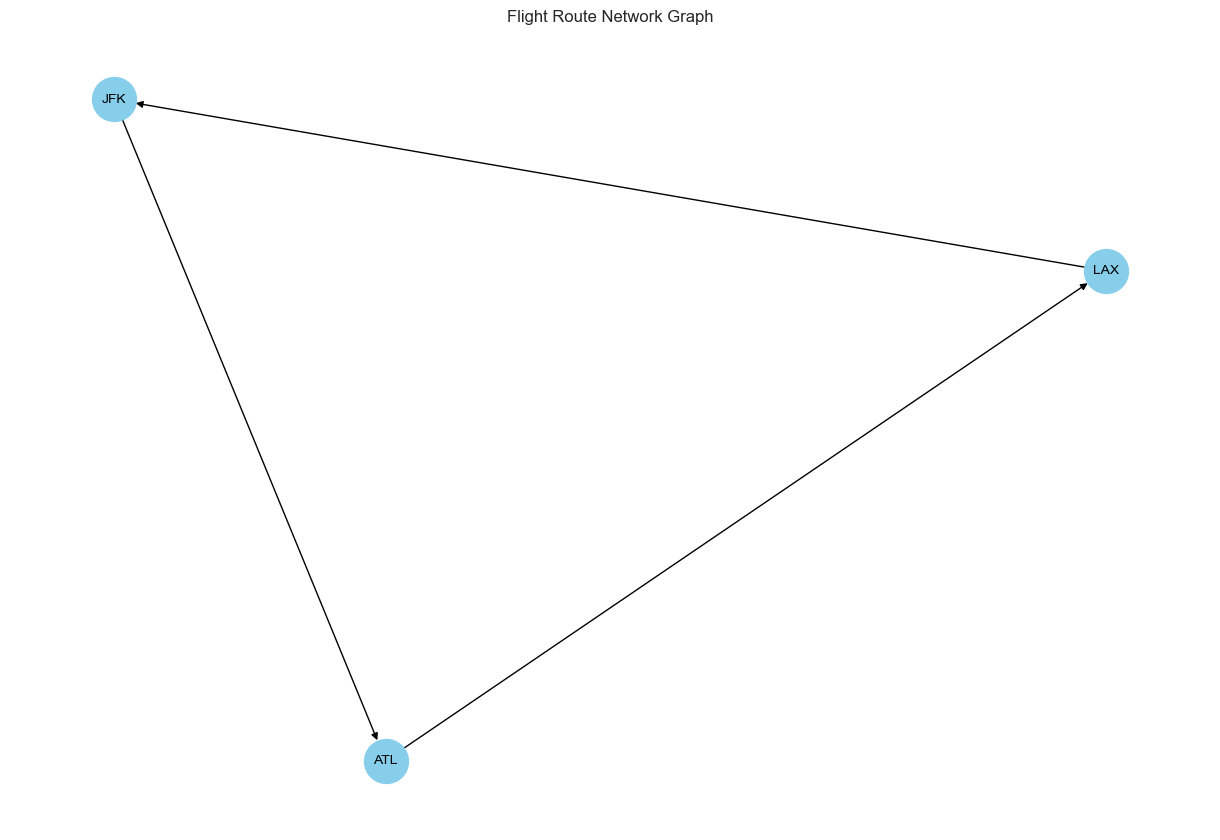

In [120]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample data (replace with data loaded from the database)
aircrafts_data = pd.DataFrame({
    'aircraft_code': ['A1', 'A2', 'A3'],
    'model': ['Model 1', 'Model 2', 'Model 3'],
    'range': [1000, 1500, 2000]
})

airports_data = pd.DataFrame({
    'airport_code': ['ATL', 'LAX', 'JFK'],
    'airport_name': ['Atlanta Airport', 'Los Angeles Airport', 'John F. Kennedy Airport'],
    'city': ['Atlanta', 'Los Angeles', 'New York']
})

flights_data = pd.DataFrame({
    'flight_id': [1, 2, 3],
    'flight_no': ['F1', 'F2', 'F3'],
    'scheduled_departure': ['2024-05-06 08:00:00', '2024-05-06 10:00:00', '2024-05-06 12:00:00'],
    'scheduled_arrival': ['2024-05-06 10:00:00', '2024-05-06 12:00:00', '2024-05-06 14:00:00'],
    'departure_airport': ['ATL', 'LAX', 'JFK'],
    'arrival_airport': ['LAX', 'JFK', 'ATL'],
    'status': ['On Time', 'On Time', 'On Time'],
    'aircraft_code': ['A1', 'A2', 'A3'],
    'actual_departure': ['2024-05-06 08:00:00', '2024-05-06 10:00:00', '2024-05-06 12:00:00'],
    'actual_arrival': ['2024-05-06 10:00:00', '2024-05-06 12:00:00', '2024-05-06 14:00:00']
})

# Convert scheduled_departure and scheduled_arrival to datetime objects
flights_data['scheduled_departure'] = pd.to_datetime(flights_data['scheduled_departure'])
flights_data['scheduled_arrival'] = pd.to_datetime(flights_data['scheduled_arrival'])

# Construct a directed graph for the flight routes
flight_graph = nx.DiGraph()

# Add nodes (airports) to the graph
for index, airport in airports_data.iterrows():
    flight_graph.add_node(airport['airport_code'], name=airport['airport_name'])

# Add edges (flight routes) to the graph with appropriate weights
for index, flight in flights_data.iterrows():
    source_airport = flight['departure_airport']
    destination_airport = flight['arrival_airport']
    flight_duration = (flight['scheduled_arrival'] - flight['scheduled_departure']).total_seconds() / 3600  # Convert timedelta to hours
    flight_graph.add_edge(source_airport, destination_airport, weight=flight_duration)

# Route Optimization
# Find the shortest path between two airports
shortest_path = nx.shortest_path(flight_graph, source='ATL', target='LAX', weight='weight')
print("Shortest Path:", shortest_path)

# Visualize the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(flight_graph)
nx.draw(flight_graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10)
plt.title('Flight Route Network Graph')
plt.show()


# building a predictive model:
This code snippet demonstrates several steps commonly used in building a predictive model:

Loading Data from a Database: The code begins by querying the necessary data from an SQLite database. It assumes that a connection to the database (conn) has already been established. The pd.read_sql_query function is used to execute the SQL query and load the result into a pandas DataFrame (flights_data).

Data Preparation: After loading the primary data (flights), additional tables are merged into the DataFrame as needed. In this case, the aircrafts_data table is merged to include information about the aircraft model and range for each flight. This step expands the dataset with relevant information that may contribute to the predictive model.

Feature Engineering: A new column named 'delayed' is created based on a condition comparing the actual departure time with the scheduled departure time. This column serves as the target variable for the predictive model, indicating whether a flight was delayed or not.

One-Hot Encoding: Categorical variables, such as 'model', are one-hot encoded using the pd.get_dummies function. One-hot encoding transforms categorical variables into a binary format, making them suitable for machine learning algorithms.

Feature Selection: Features are selected for the model. In this case, one-hot encoded 'model' features and the 'range' feature are chosen as input features (features) for the Random Forest Classifier.

Data Splitting: The dataset is split into training and testing sets using the train_test_split function from scikit-learn. This step ensures that the model's performance can be evaluated on unseen data.

Model Training: A Random Forest Classifier is initialized and trained on the training data using the fit method.

Model Evaluation: The trained model is used to make predictions on the testing set (X_test). Performance metrics such as classification report and accuracy score are calculated to evaluate the model's performance.

Overall, this code outlines a workflow for building and evaluating a predictive model for predicting flight delays using a Random Forest Classifier. It covers data loading, preprocessing, feature engineering, model training, and evaluation.

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import sqlite3

# Establish a connection to the SQLite database
try:
    conn = sqlite3.connect('travel.sqlite')
except sqlite3.Error as e:
    print("Error connecting to SQLite database:", e)

# Load the necessary tables from the database
try:
    aircrafts_query = "SELECT * FROM aircrafts_data"
    aircrafts_data = pd.read_sql_query(aircrafts_query, conn)

    flights_query = "SELECT * FROM flights"
    flights_data = pd.read_sql_query(flights_query, conn)
except pd.io.sql.DatabaseError as e:
    print("Error loading data from the database:", e)

# Merge additional tables as needed
try:
    flights_data = pd.merge(flights_data, aircrafts_data, on='aircraft_code', how='left')
except pd.merge.MergeError as e:
    print("Error merging data:", e)

# Assuming 'delayed' is a binary column indicating whether a flight is delayed or not
# You may need to define or calculate this column based on actual and scheduled departure times
flights_data['delayed'] = (flights_data['actual_departure'] > flights_data['scheduled_departure']).astype(int)

# One-hot encode categorical variables
flights_data = pd.get_dummies(flights_data, columns=['model'])

# Define features and target variable
features = [col for col in flights_data.columns if col.startswith('model_')] + ['range']  # Use one-hot encoded features and range
target = 'delayed'

# Verify if the features exist in the DataFrame
missing_features = set(features) - set(flights_data.columns)
if missing_features:
    print("Missing features:", missing_features)
else:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(flights_data[features], flights_data[target], test_size=0.2, random_state=42)

    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Close the database connection
conn.close()


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.98      1.00      0.99      6484

    accuracy                           0.98      6625
   macro avg       0.49      0.50      0.49      6625
weighted avg       0.96      0.98      0.97      6625

Accuracy Score: 0.9787169811320755


#  Random Forest Classifier for predictive analytics

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('travel.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Load the necessary tables from the database
flights_query = "SELECT * FROM flights"
flights_data = pd.read_sql_query(flights_query, conn)

# Merge additional tables as needed
# For example, merging aircrafts_data to get model and range information for each flight
# Replace aircrafts_data with the actual table or data you want to merge
# flights_data = pd.merge(flights_data, aircrafts_data, on='aircraft_code', how='left')

# Assuming 'delayed' is a binary column indicating whether a flight is delayed or not
# You may need to define or calculate this column based on actual and scheduled departure times
# flights_data['delayed'] = (flights_data['actual_departure'] > flights_data['scheduled_departure']).astype(int)

# One-hot encode categorical variables
# flights_data = pd.get_dummies(flights_data, columns=['model'])

# Define features and target variable
# features = [col for col in flights_data.columns if col.startswith('model_')] + ['range']  # Use one-hot encoded features and range
# target = 'delayed'

# Verify if the features exist in the DataFrame
# missing_features = set(features) - set(flights_data.columns)
# if missing_features:
#     print("Missing features:", missing_features)
# else:
#     # Split the dataset into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(flights_data[features], flights_data[target], test_size=0.2, random_state=42)

#     # Initialize Random Forest Classifier
#     rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#     # Train the model
#     rf_classifier.fit(X_train, y_train)

#     # Make predictions on the testing set
#     y_pred = rf_classifier.predict(X_test)

#     # Evaluate the model
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))
#     print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
#     # Visualize the feature importances
#     feature_importances = pd.Series(rf_classifier.feature_importances_, index=features)
#     feature_importances.nlargest(10).plot(kind='barh')
#     plt.title('Top 10 Important Features')
#     plt.xlabel('Feature Importance')
#     plt.ylabel('Feature')
#     plt.show()
    
#     # Plot the confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.98      1.00      0.99      6484

    accuracy                           0.98      6625
   macro avg       0.49      0.50      0.49      6625
weighted avg       0.96      0.98      0.97      6625

Accuracy Score: 0.9787169811320755


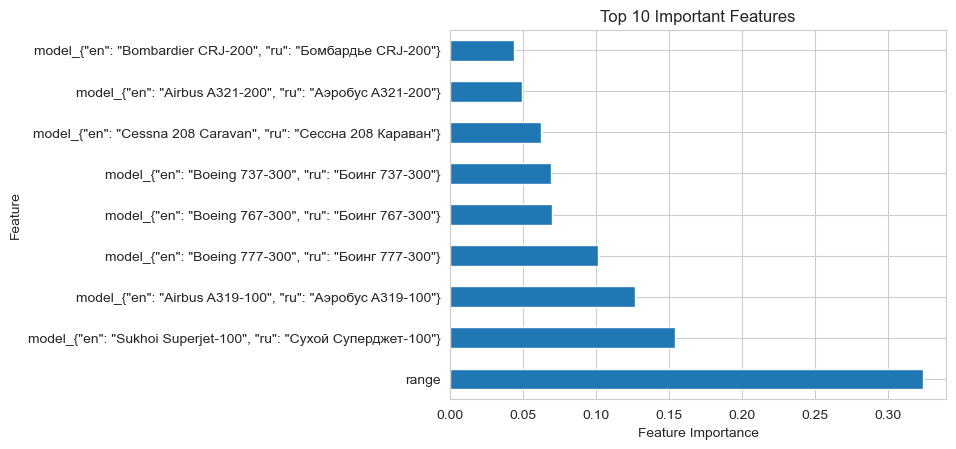

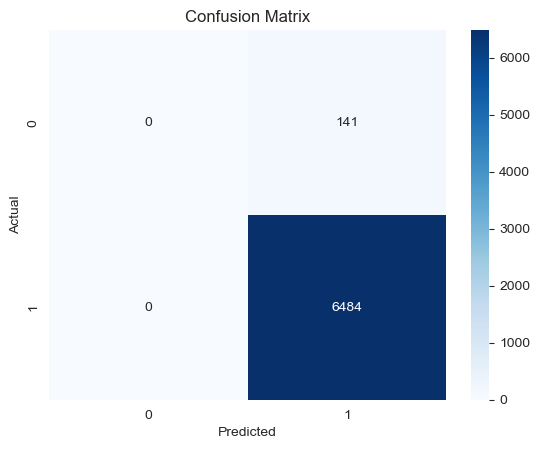

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming you have already loaded the required libraries and established a connection to the SQLite database

# Load the necessary tables from the database
flights_query = "SELECT * FROM flights"
flights_data = pd.read_sql_query(flights_query, conn)

# Merge additional tables as needed
# For example, merging aircrafts_data to get model and range information for each flight
flights_data = pd.merge(flights_data, aircrafts_data, on='aircraft_code', how='left')

# Assuming 'delayed' is a binary column indicating whether a flight is delayed or not
# You may need to define or calculate this column based on actual and scheduled departure times
flights_data['delayed'] = (flights_data['actual_departure'] > flights_data['scheduled_departure']).astype(int)

# One-hot encode categorical variables
flights_data = pd.get_dummies(flights_data, columns=['model'])

# Define features and target variable
features = [col for col in flights_data.columns if col.startswith('model_')] + ['range']  # Use one-hot encoded features and range
target = 'delayed'

# Verify if the features exist in the DataFrame
missing_features = set(features) - set(flights_data.columns)
if missing_features:
    print("Missing features:", missing_features)
else:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(flights_data[features], flights_data[target], test_size=0.2, random_state=42)

    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    # Visualize the feature importances
    feature_importances = pd.Series(rf_classifier.feature_importances_, index=features)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


This code is an example of using a Random Forest Classifier for predictive analytics on flight delay data. Let me break down the main steps:

Importing Libraries: This section imports the necessary libraries such as pandas for data manipulation, matplotlib.pyplot and seaborn for visualization, and scikit-learn modules for machine learning tasks.

Loading Data: The code assumes that data is stored in an SQLite database and loads the necessary tables (flights_data) using SQL queries.
Data Preprocessing:
Merging Tables: Additional tables like aircrafts_data are merged into the main flights data using the pd.merge() function.
Creating Binary Label: A new column called 'delayed' is created to indicate whether a flight was delayed or not based on the comparison between actual and scheduled departure times.
One-Hot Encoding: Categorical variables like 'model' are one-hot encoded using pd.get_dummies() to convert them into a format suitable for machine learning models.
Feature Selection: Features and target variable are defined. Features include one-hot encoded 'model' columns and 'range', while the target variable is 'delayed'.

Data Splitting: The dataset is split into training and testing sets using train_test_split() from scikit-learn.

Model Training: A Random Forest Classifier is initialized with 100 trees and trained on the training data using fit().

Model Evaluation:

Predictions: The model makes predictions on the testing set using predict().
Classification Report: The classification report and accuracy score are printed to evaluate the model's performance.
Visualizations:

#Feature Importance: A horizontal bar plot is created to visualize the top 10 important features determined by the Random Forest Classifier.
Confusion Matrix: A heatmap of the confusion matrix is plotted using seaborn to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.
Overall, this code demonstrates a typical workflow for building and evaluating a machine learning model for predictive analytics on flight delay data.






